# 🚁 Predictive Maintenance of Helicopter Turboshaft Engines using Machine Learning

This notebook demonstrates how to detect helicopter turboshaft engine faults using a machine learning pipeline. It includes data loading, preprocessing, class balancing, model training, evaluation, and testing on a sample input.

## 1. Import Required Libraries
We begin by importing essential Python libraries for data manipulation, machine learning, and visualization.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

## 2. Load the Dataset
Load the Helicopter Turboshaft Fault Detection dataset.

In [21]:
df = pd.read_csv('Helicopter_Turboshaft_Fault_Detection.csv')
df.head()

,Timestamp,Temp_Compressor,Temp_Turbine,Pressure_Compressor,Vibration_Compressor,Speed_Turbine,Fuel_Flow,Altitude,Airspeed,Ambient_Temp,Fault_Label
0,2024-03-01 00:00:00,0.516699,-0.482741,1.218923,0.439431,1.109674,0.259894,-0.457097,0.935177,0.520473,Normal
1,2024-03-01 01:00:00,-0.137372,-1.071038,-0.581229,0.165394,-0.344521,0.381376,1.416960,-0.804455,-0.461119,Normal
2,2024-03-01 02:00:00,0.672213,-0.867799,0.268908,1.551952,1.156725,0.647181,0.053060,-1.435661,-1.606553,Normal
3,2024-03-01 03:00:00,1.573874,-1.351055,0.142967,0.176228,0.047683,-1.703167,-1.739264,-0.980834,0.247414,Normal
4,2024-03-01 04:00:00,-0.236144,-0.949079,-1.116520,0.251032,0.122548,-0.376294,0.681555,0.341163,-1.328883,Turbine Blade Damage


## Data Exploration

In [22]:
# Check the shape of the dataset
print("Shape:", df.shape)

# View first few rows
df.head()

# Overview of columns and data types
df.info()

# Summary statistics
df.describe()


Shape: (7012, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7012 entries, 0 to 7011
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Timestamp             7012 non-null   object 
 1   Temp_Compressor       7012 non-null   float64
 2   Temp_Turbine          7012 non-null   float64
 3   Pressure_Compressor   7012 non-null   float64
 4   Vibration_Compressor  7012 non-null   float64
 5   Speed_Turbine         7012 non-null   float64
 6   Fuel_Flow             7012 non-null   float64
 7   Altitude              7012 non-null   float64
 8   Airspeed              7012 non-null   float64
 9   Ambient_Temp          7012 non-null   float64
 10  Fault_Label           7012 non-null   object 
dtypes: float64(9), object(2)
memory usage: 602.7+ KB


,Temp_Compressor,Temp_Turbine,Pressure_Compressor,Vibration_Compressor,Speed_Turbine,Fuel_Flow,Altitude,Airspeed,Ambient_Temp
count,7.012000e+03,7.012000e+03,7.012000e+03,7.012000e+03,7.012000e+03,7.012000e+03,7.012000e+03,7.012000e+03,7.012000e+03
mean,-1.045750e-15,-2.294165e-15,-4.245827e-16,1.504786e-16,6.220796e-15,-1.381161e-15,-3.850631e-17,-9.525245e-17,2.148247e-16
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00
min,-2.772926e+00,-2.731452e+00,-2.779824e+00,-2.818930e+00,-2.797912e+00,-2.810185e+00,-1.742798e+00,-1.738476e+00,-2.803083e+00
25%,-6.834192e-01,-6.938367e-01,-6.953875e-01,-7.161923e-01,-6.923787e-01,-6.965294e-01,-8.454536e-01,-8.659915e-01,-7.014270e-01
50%,1.456606e-03,-6.255666e-03,2.105707e-03,1.382664e-02,-6.137782e-03,7.190528e-03,-2.740623e-03,1.511656e-02,2.227411e-03
75%,6.888450e-01,6.816986e-01,6.988208e-01,6.946732e-01,6.977878e-01,7.026591e-01,8.707817e-01,8.738380e-01,6.980463e-01
max,2.779058e+00,2.768032e+00,2.785446e+00,2.790486e+00,2.795210e+00,2.798471e+00,1.726135e+00,1.732903e+00,2.808385e+00


In [23]:
df.isnull().sum()

,0
Timestamp,0
Temp_Compressor,0
Temp_Turbine,0
Pressure_Compressor,0
Vibration_Compressor,0
Speed_Turbine,0
Fuel_Flow,0
Altitude,0
Airspeed,0
Ambient_Temp,0


In [24]:
df['Fault_Label'].value_counts()
df['Fault_Label'].value_counts(normalize=True) * 100


,proportion
Fault_Label,
Normal,73.545351
Compressor Degradation,8.328580
Turbine Blade Damage,6.332002
Sensor Malfunction,5.618939
Fuel System Anomaly,3.108956
Excessive Vibration Fault,3.066172


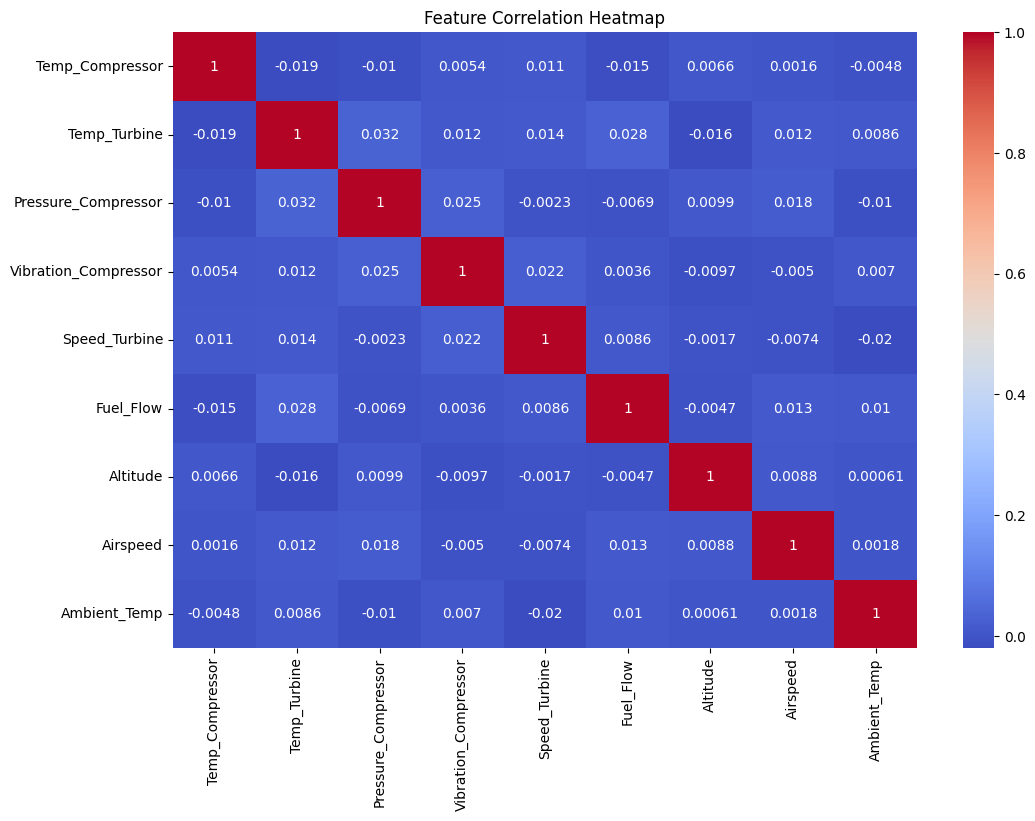

,Temp_Compressor,Temp_Turbine,Pressure_Compressor,Vibration_Compressor,Speed_Turbine,Fuel_Flow,Altitude,Airspeed,Ambient_Temp
Temp_Compressor,1.000000,-0.019033,-0.009973,0.005419,0.010743,-0.014580,0.006629,0.001596,-0.004770
Temp_Turbine,-0.019033,1.000000,0.032028,0.011641,0.014415,0.028248,-0.016251,0.012353,0.008638
Pressure_Compressor,-0.009973,0.032028,1.000000,0.025467,-0.002326,-0.006924,0.009884,0.018118,-0.010146
Vibration_Compressor,0.005419,0.011641,0.025467,1.000000,0.021963,0.003595,-0.009748,-0.004953,0.006966
Speed_Turbine,0.010743,0.014415,-0.002326,0.021963,1.000000,0.008595,-0.001716,-0.007410,-0.020174
Fuel_Flow,-0.014580,0.028248,-0.006924,0.003595,0.008595,1.000000,-0.004651,0.013468,0.010381
Altitude,0.006629,-0.016251,0.009884,-0.009748,-0.001716,-0.004651,1.000000,0.008814,0.000611
Airspeed,0.001596,0.012353,0.018118,-0.004953,-0.007410,0.013468,0.008814,1.000000,0.001816
Ambient_Temp,-0.004770,0.008638,-0.010146,0.006966,-0.020174,0.010381,0.000611,0.001816,1.000000


In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Display the numerical correlation matrix
display(df.corr(numeric_only=True))

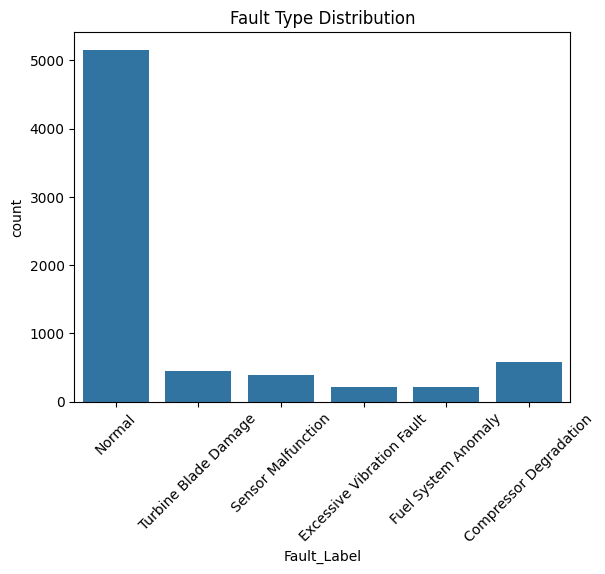

In [26]:
# Fault label distribution
sns.countplot(data=df, x='Fault_Label')
plt.xticks(rotation=45)
plt.title('Fault Type Distribution')
plt.show()

## 3. Encode Fault Labels
Convert categorical fault labels into numerical labels using `LabelEncoder`.

In [27]:
df = df.drop(columns=['Timestamp'])

In [28]:
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Fault_Label'])
print(le.classes_)

['Compressor Degradation' 'Excessive Vibration Fault'
 'Fuel System Anomaly' 'Normal' 'Sensor Malfunction'
 'Turbine Blade Damage']


## 4. Define Features and Target
Separate the input features (X) and the output class label (y).


In [29]:
X = df.drop(columns=['Fault_Label', 'Label'])
y = df['Label']

## 6. Balance Classes with SMOTE
Use SMOTE (Synthetic Minority Oversampling Technique) to balance the training data.



In [30]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

## 5. Train-Test Split
Split the dataset into training and testing sets for evaluation.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

## 7. Train Random Forest Model
Train a `RandomForestClassifier` on the balanced dataset.

In [32]:
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

## 8. Evaluate Model Performance
Use the test set to evaluate model performance and visualize the confusion matrix.

In [33]:
y_pred = model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Classification Report:
                            precision    recall  f1-score   support

   Compressor Degradation       0.91      0.95      0.93      1018
Excessive Vibration Fault       0.95      0.99      0.97      1070
      Fuel System Anomaly       0.94      0.98      0.96      1014
                   Normal       0.92      0.71      0.80      1045
       Sensor Malfunction       0.95      0.98      0.96      1064
     Turbine Blade Damage       0.91      0.98      0.95       978

                 accuracy                           0.93      6189
                macro avg       0.93      0.93      0.93      6189
             weighted avg       0.93      0.93      0.93      6189



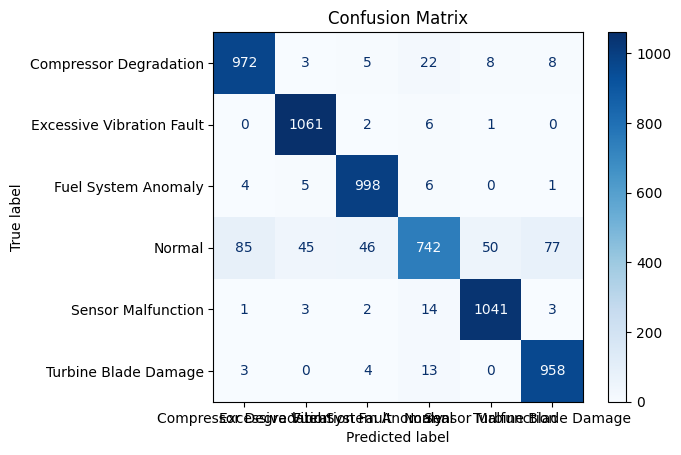

In [34]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

## 9. Save the Trained Model
Save the trained model using `joblib` so it can be reused for predictions.

In [35]:
# 8. Save Model & Label Encoder
joblib.dump(model, "helicopter_fault_model.pkl")
joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']

## 10. Predict on a Sample Input
Use the saved model to predict a new sample input.

In [38]:
sample_input = pd.DataFrame({
    'Temp_Compressor': [0.516699],
    'Temp_Turbine': [-0.482741],
    'Pressure_Compressor': [1.218923],
    'Vibration_Compressor': [0.439431],
    'Speed_Turbine': [1.109674],
    'Fuel_Flow': [0.259894],
    'Altitude': [-0.457097],
    'Airspeed': [0.935177],
    'Ambient_Temp': [0.520473]
})

# Load model and label encoder
loaded_model = joblib.load('helicopter_fault_model.pkl')
loaded_le = joblib.load('label_encoder.pkl')

# Predict
sample_pred = loaded_model.predict(sample_input)
predicted_label = loaded_le.inverse_transform(sample_pred)

print("\nPredicted Fault Type for Sample:", predicted_label[0])


Predicted Fault Type for Sample: Normal


## Anomaly